In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #그래프 출력시
import matplotlib as mpl #그래프 옵션
#그래프 시각화 옵션
%matplotlib inline
#그래프 한글 설정
mpl.rc('font',family = "NanumGothic")
from IPython.display import set_matplotlib_formats
#그래프의 한글을 더욱 선명하게 출력
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
#그래프에서 음수값이 나올 떄, 깨지는 현상 방지
mpl.rc('axes', unicode_minus = False)

pd.options.display.max_columns = 100

In [2]:
data = pd.read_csv('/home/pirl/Downloads/dataset_0225_eysidecision treeght.csv')
print(data.shape)

(925724, 30)


In [3]:
# normal = (data['총콜레스테롤'] <= 200) & (data['LDL콜레스테롤'] <= 130) & (data['HDL콜레스테롤'] >= 60) & (data['트리글리세라이드'] <= 150)

In [4]:
def abnormal(row):
    if(row['총콜레스테롤'] >= 240) | (row['LDL콜레스테롤'] >= 160) | (row['HDL콜레스테롤'] < 40) | (row['트리글리세라이드'] >= 200):
        return 1 
    else:
        return 0
data['이상지질혈증']=data.apply(abnormal,axis=1)

In [5]:
data["지질혈증 의사 판정"]=(data['총콜레스테롤']>=240)|(data["트리글리세라이드"]>=200)|(data["HDL콜레스테롤"] < 40)|(data["LDL콜레스테롤"]>=160)

In [6]:
data["지질혈증 의사 판정"]=data["지질혈증 의사 판정"].replace({True:1,False:0})

In [7]:
# data['이상지질혈증']=data.apply(abnormal,axis=1)

In [8]:
data['지질혈증 의사 판정'].value_counts()

0    682036
1    243688
Name: 지질혈증 의사 판정, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925724 entries, 0 to 925723
Data columns (total 31 columns):
가입자일련번호        925724 non-null int64
성별코드           925724 non-null int64
연령대코드(5세단위)    925724 non-null int64
시도코드           925724 non-null int64
신장(5Cm단위)      925724 non-null float64
체중(5Kg단위)      925724 non-null float64
허리둘레           925724 non-null float64
시력(좌)          925724 non-null int64
시력(우)          925724 non-null int64
청력(좌)          925724 non-null float64
청력(우)          925724 non-null float64
수축기혈압          925724 non-null float64
이완기혈압          925724 non-null float64
식전혈당(공복혈당)     925724 non-null float64
총콜레스테롤         925724 non-null float64
트리글리세라이드       925724 non-null float64
HDL콜레스테롤       925724 non-null float64
LDL콜레스테롤       925724 non-null float64
혈색소            925724 non-null float64
요단백            925724 non-null float64
혈청크레아티닌        925724 non-null float64
(혈청지오티)AST     925724 non-null float64
(혈청지오티)ALT     925724 non-null float64
감마지티

In [10]:
#병 1개
data['당뇨병_단일'] = ((data['당뇨병 의사 판정'] == 1) & (data['고혈압 의사 판정'] == 0) & (data['지질혈증 의사 판정'] == 0))
data['고혈압_단일'] = ((data['당뇨병 의사 판정'] == 0) & (data['고혈압 의사 판정'] == 1) & (data['지질혈증 의사 판정'] == 0))
data['지질혈증_단일'] = ((data['당뇨병 의사 판정'] == 0) & (data['고혈압 의사 판정'] == 0) & (data['지질혈증 의사 판정'] == 1))
#병 2개
data['합병증_(당뇨_고혈압)'] = ((data['당뇨병 의사 판정'] == 1) & (data['고혈압 의사 판정'] == 1) & (data['지질혈증 의사 판정'] == 0)) 
data['합병증_(지질_고혈압)'] = ((data['지질혈증 의사 판정'] == 1) & (data['고혈압 의사 판정'] == 1) & (data['당뇨병 의사 판정'] == 0))
data['합병증_(당뇨_지질)'] = ((data['당뇨병 의사 판정'] == 1) & (data['지질혈증 의사 판정'] == 1) & (data['고혈압 의사 판정'] == 0))
#병 3개
data['합병증 종합'] = ((data['고혈압 의사 판정'] == 1) & (data['당뇨병 의사 판정'] == 1) & (data['지질혈증 의사 판정'] == 1))

In [11]:
data['당뇨병_단일'] = data['당뇨병_단일'].replace({True:1,False:0})
data['고혈압_단일'] = data['고혈압_단일'].replace({True:1,False:0})
data['지질혈증_단일'] = data['지질혈증_단일'].replace({True:1,False:0})
data['합병증_(당뇨_고혈압)'] = data['합병증_(당뇨_고혈압)'].replace({True:1,False:0})
data['합병증_(지질_고혈압)'] = data['합병증_(지질_고혈압)'].replace({True:1,False:0})
data['합병증_(당뇨_지질)'] = data['합병증_(당뇨_지질)'].replace({True:1,False:0})
data['합병증 종합'] = data['합병증 종합'].replace({True:1,False:0})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925724 entries, 0 to 925723
Data columns (total 38 columns):
가입자일련번호         925724 non-null int64
성별코드            925724 non-null int64
연령대코드(5세단위)     925724 non-null int64
시도코드            925724 non-null int64
신장(5Cm단위)       925724 non-null float64
체중(5Kg단위)       925724 non-null float64
허리둘레            925724 non-null float64
시력(좌)           925724 non-null int64
시력(우)           925724 non-null int64
청력(좌)           925724 non-null float64
청력(우)           925724 non-null float64
수축기혈압           925724 non-null float64
이완기혈압           925724 non-null float64
식전혈당(공복혈당)      925724 non-null float64
총콜레스테롤          925724 non-null float64
트리글리세라이드        925724 non-null float64
HDL콜레스테롤        925724 non-null float64
LDL콜레스테롤        925724 non-null float64
혈색소             925724 non-null float64
요단백             925724 non-null float64
혈청크레아티닌         925724 non-null float64
(혈청지오티)AST      925724 non-null float64
(혈청지오티)ALT      92572

## ============= Testing =============

In [81]:
data[data['당뇨병_단일'] == 1]['당뇨병_단일'].value_counts()

1    36251
Name: 당뇨병_단일, dtype: int64

In [83]:
data[data['고혈압_단일'] == 1]['고혈압_단일'].value_counts()

1    20412
Name: 고혈압_단일, dtype: int64

In [84]:
data[data['지질혈증_단일'] == 1]['지질혈증_단일'].value_counts()

1    209256
Name: 지질혈증_단일, dtype: int64

In [73]:
data.columns

Index(['가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '구강검진 수검여부', '당뇨병 의사 판정', '고혈압 의사 판정', '간기능 이상여부', '알콜성간염여부',
       '지질혈증 의사 판정', '당뇨병_단일', '고혈압_단일', '지질혈증_단일', '합병증_(당뇨_고혈압)',
       '합병증_(지질_고혈압)', '합병증_(당뇨_지질)', '합병증 종합'],
      dtype='object')

In [36]:
msk = ((data['당뇨병 의사 판정'] == 0) & (data['고혈압 의사 판정'] == 0) & (data['지질혈증 의사 판정'] == 0))

In [37]:
print(len(data[msk]))
print(len(data[~msk]))

622707
303017


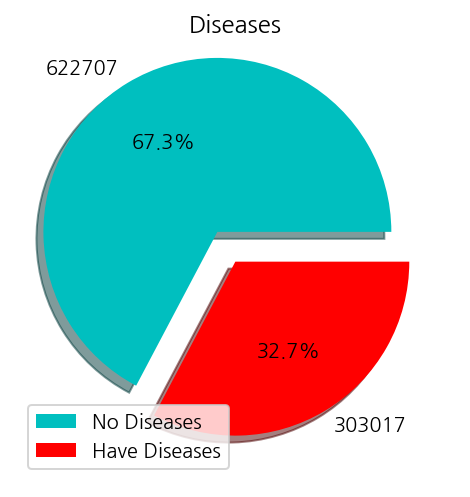

<Figure size 504x504 with 0 Axes>

In [71]:
import matplotlib.pyplot as plot

values = [len(data[msk]),len(data[~msk])]
colors = ['c','r']
labels = ['No Diseases','Have Diseases']
explode = (0.2,0)
plt.pie(values, colors=colors, labels= values,explode=explode,autopct='%1.1f%%', shadow=True)
plt.title('Diseases')
plt.legend(labels,loc=3)
plt.show()

## =========ETC=========

In [31]:
# from sklearn.model_selection import train_test_split

# data_y = data["합병증_(당뇨_고혈압)"]
# data_x = data.drop(["합병증_(당뇨_고혈압)",'합병증 종합','합병증_(당뇨_지질)','합병증_(지질_고혈압)','지질혈증_단일','당뇨병_단일'],axis=1,inplace = False)

# data_train_x,data_test_x,data_train_y,data_test_y = train_test_split(data_x,data_y,test_size = 0.3,random_state = 1234)

# print("train data X size : {}".format(data_train_x.shape))
# print("train data Y size : {}".format(data_train_y.shape))
# print("test data X size : {}".format(data_test_x.shape))
# print("test data Y size : {}".format(data_test_y.shape))

In [32]:
# from sklearn.ensemble import RandomForestClassifier

# tree_uncustomized = RandomForestClassifier(random_state=1234)
# tree_uncustomized.fit(data_train_x, data_train_y)

# print("Accuracy on training set : {:.3f}".format(tree_uncustomized.score(data_train_x,data_train_y)))
# print("Accuracy on test set : {:.3f}".format(tree_uncustomized.score(data_test_x,data_test_y)))

In [33]:
# answer = tree_uncustomized.predict_proba(data_test_x)
# answer

In [34]:
# data_test_y.value_counts()

In [35]:
# from sklearn.metrics import f1_score
# y_pred = tree_uncustomized.predict(data_test_x)
# f1_score(y_pred, data_test_y)